# Лекция №5

## И снова контуры

В разделе по фильтрации уже упоминались алгоритмы получения границ. Полученные границы достаточно просто преобразуются в контуры. Для алгоритма Кэнни это происходит автоматически, для остальных алгоритмов требуется дополнительная бинаризация. Получить контур для бинарного алгоритма можно например алгоритмом [жука](http://wiki.technicalvision.ru/index.php/%D0%92%D1%8B%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BD%D1%82%D1%83%D1%80%D0%BE%D0%B2).

В OpenCV поиск контуров похож на поиск белого объекта на черном фоне. Помните, что объект, который нужно найти, должен быть белым, а фон должен быть черным.
Давайте посмотрим, как найти контуры двоичного изображения с помощью метода **Фридмана**:

**Цепной код Фримена (Фридмана) (Freeman Chain Code)**

Цепные коды применяются для представления границы в виде последовательности отрезков прямых линий определённой длины и направления. В основе этого представления лежит 4- или 8- связная решётка. Длина каждого отрезка определяется разрешением решётки, а направления задаются выбранным кодом.
(для представления всех направлений в 4-связной решётке достаточно 2-х бит, а для 8-связной решётки цепного кода требуется 3 бита)


<img src="img/freeman_chain_code.png" alt="Drawing" style="width: 300px;"/> 

Если честно, то у меня ни разу ни получилось применить контурный анализ в реальных задачах. Уж слишком идеальные условия требуются. То граница не найдётся, то шумов слишком много. Но, если нужно что-то распознавать в идеальных условиях $-$ то контурный анализ замечательный вариант. Очень быстро работает, красивая математика и понятная логика.

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread('img/RGB_cube.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=0.15, ksize=5)
laplac = cv2.medianBlur(laplac, 3)
im2, contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


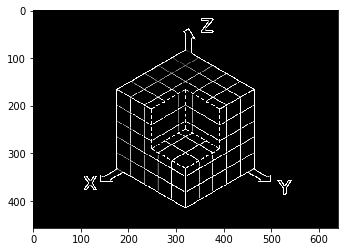

In [3]:
plt.imshow(laplac, cmap='gray');

Смотрите, в функции **cv2.findContours()** есть три аргумента, первый - исходное изображение, второй - режим поиска контура, третий - метод аппроксимации контура. И это выводит измененное изображение, контуры и иерархию. contours - это список всех контуров в изображении на языке Python. Каждый отдельный контур представляет собой массив Numpy с координатами (x, y) граничных точек объекта.

*Мы обсудим второй и третий аргументы, и подробнее об иерархии позже.*

### Как нарисовать контуры?
Для рисования контуров используется функция **cv2.drawContours()**. Его также можно использовать для рисования любой фигуры, если у вас есть граничные точки. Его первый аргумент является исходным изображением, второй аргумент - это контуры, которые должны быть переданы в виде списка Python, третий аргумент - это индекс контуров (полезно при рисовании отдельного контура. Чтобы нарисовать все контуры, передайте -1), а остальные аргументы - это цвет, толщина и т.п.

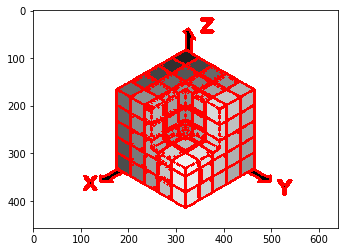

In [4]:
## нарисуем все найденные контуры
img1 = gray_img.copy()
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img1, contours, -1, (255,0,0), 3)

plt.imshow(img1);

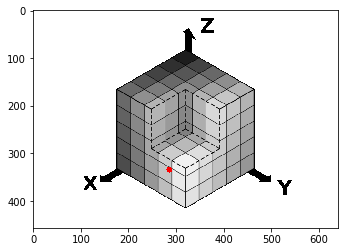

In [5]:
## нарисуем один выбранный контур
img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, contours, 53, (255,0,0), 10)

plt.imshow(img2);

## Contour Features

Пройдемся по основным методам работы с характеристиками конутра, которые доступны в OpenCV.

### 1. Моменты
Моменты изображения помогают вам рассчитать некоторые функции, такие как центр масс объекта, площадь объекта и т. д. Посетите страницу [википедии](https://en.wikipedia.org/wiki/Image_moment) по моментам изображения, если хотите в них углубиться.

Функция **cv2.moments()** предоставляет словарь всех вычисленных значений моментов.

In [6]:
img = cv2.imread('img/RGB_cube.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

laplac = cv2.Laplacian(gray_img, cv2.THRESH_BINARY, scale=1, ksize=5)
laplac = cv2.medianBlur(laplac, 3)
im2, contours, hierarchy = cv2.findContours(laplac, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[100]
M = cv2.moments(cnt)
M

{'m00': 1311.5,
 'm10': 374766.8333333333,
 'm01': 398632.6666666666,
 'm20': 107282145.91666666,
 'm11': 113859163.54166666,
 'm02': 121296141.75,
 'm30': 30765924110.45,
 'm21': 32578689349.933334,
 'm12': 34629362207.566666,
 'm03': 36948216401.3,
 'mu20': 190892.1105710119,
 'mu11': -51856.01600690186,
 'mu02': 131061.35825181007,
 'mu30': 487463.8866844177,
 'mu21': -266107.6853415072,
 'mu12': -14792.28963728249,
 'mu03': 374144.60594940186,
 'nu20': 0.1109817043087488,
 'nu11': -0.030148281235367454,
 'nu02': 0.07619703540547573,
 'nu30': 0.007825673232243896,
 'nu21': -0.0042720534729982955,
 'nu12': -0.00023747323282847146,
 'nu03': 0.006006462238016428}

In [7]:
## Коэффициент асимметрии
import math
sigma_x = math.sqrt(M['m20']/M['m00'])
sigma_y = math.sqrt(M['m02']/M['m00'])

k_x = M['m30']/sigma_x**3
k_y = M['m03']/sigma_y**3

k_x, k_y

(1315.0165812314067, 1313.637206903704)

Из этих моментов вы можете извлечь полезные данные, такие как площадь, центроид и т.д. Центроид определяется отношениями, ${C_x = \frac{M_{10}}{M_{00}}}$ and ${C_y = \frac{M_{01}}{M_{00}}}$.

Cx = 285 Cy = 303


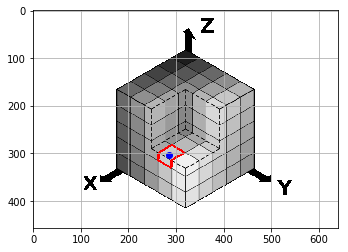

In [8]:
Cx = int(M['m10']/M['m00'])
Cy = int(M['m01']/M['m00'])
print('Cx =', Cx, 'Cy =', Cy)

img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cnt = contours[100]
cv2.drawContours(img2, [cnt], 0, (255,0,0), 3)
plt.scatter(Cx, Cy, color='blue')

plt.grid()
plt.imshow(img2);

### 2. Контурная зона
Площадь контура задается функцией **cv2.contourArea()** или из моментов, **M['m00']**.

In [9]:
area = cv2.contourArea(cnt)
area

1311.5

### 3. Периметр контура
Это также называется длиной дуги. Это можно узнать с помощью функции **cv2.arcLength()**. Второй аргумент указывает, является ли фигура замкнутым контуром (если передан True) или просто кривой.

In [10]:
perimeter = cv2.arcLength(cnt,True)

print(round(perimeter, 3))

165.581


### 4. Контурное приближение
Он приближает форму контура к другой форме с меньшим количеством вершин в зависимости от заданной нами точности. Это реализация алгоритма Дугласа-Пекера. Проверьте страницу википедии на алгоритм и демонстрацию.

Чтобы понять это, предположим, что вы пытаетесь найти квадрат на изображении, но из-за некоторых проблем на изображении вы получили не идеальный квадрат, а "плохую форму" (как показано на первом изображении ниже). Теперь вы можете использовать эту функцию для аппроксимации формы. В этом случае второй аргумент называется эпсилон, который является максимальным расстоянием от контура до приближенного контура. Это параметр точности. Для правильного вывода необходим мудрый выбор эпсилона.

<img src="img/approx.jpg" alt="Drawing" style="width: 600px;"/> 

Выше, на втором изображении, зеленая линия показывает приблизительную кривую для эпсилона = $10$% длины дуги. Третье изображение показывает то же самое для эпсилона = $1$% длины дуги. Третий аргумент указывает, является ли кривая замкнутой или нет.

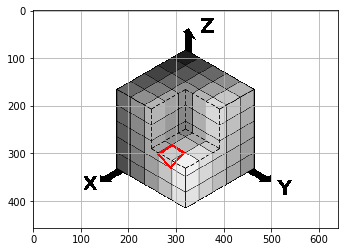

In [11]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img2, [approx], 0, (255,0,0), 3)

plt.grid()
plt.imshow(img2);

### 5. Выпуклый контур
Выпуклая оболочка будет похожа на контурную аппроксимацию, но это не так (оба могут давать одинаковые результаты в некоторых случаях). Здесь функция **cv2.convexHull()** проверяет кривую на наличие дефектов выпуклости и исправляет ее. Вообще говоря, выпуклые кривые $-$ это кривые, которые всегда выпуклые или, по крайней мере, плоские. И если он выпуклый внутри, это называется дефектами выпуклости. Например, проверьте изображение ниже. Красная линия показывает выпуклый корпус руки. Двусторонние стрелки показывают дефекты выпуклости, которые представляют собой локальные максимальные отклонения корпуса от контуров.
<img src="img/convexitydefects.jpg" alt="Drawing" style="width: 300px;"/> 

**hull = cv2.convexHull(points, clockwise, returnPoints)**

* **points** $-$ точки контура.

* **clockwise** $-$ флаг ориентации. Если это правда, выходной выпуклый корпус ориентирован по часовой стрелке. В противном случае он ориентирован против часовой стрелки.

* **returnPoints** $-$ по умолчанию True. Затем он возвращает координаты точек корпуса. Если False, он возвращает индексы точек контура, соответствующие точкам корпуса.

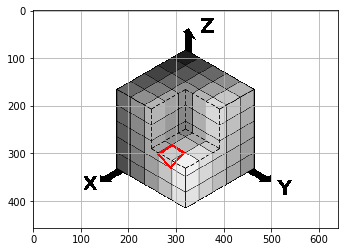

In [12]:
hull = cv2.convexHull(cnt)
hull_id = cv2.convexHull(cnt, returnPoints=False)

plt.grid()
plt.imshow(img2);

Но если вы хотите найти дефекты выпуклости, вам нужно передать returnPoints = False.

### 6. Проверка выпуклости
Есть функция, чтобы проверить, является ли кривая выпуклой или нет, **cv2.isContourConvex()**. Это просто возвращает True или False

Подумайте, как это можно сделать без этой функции?

In [13]:
k = cv2.isContourConvex(cnt)

print(k)

False


### 7. Ограничивающий прямоугольник

#### 7.a. Прямой ограничивающий прямоугольник
Это прямой прямоугольник, он не учитывает вращение объекта. Таким образом, площадь ограничивающего прямоугольника не будет минимальной. Он находится функцией **cv2.boundingRect()**.

Пусть $(x,y)$ $-$ верхняя левая координата прямоугольника, а $(w,h)$ $-$ его ширина и высота.

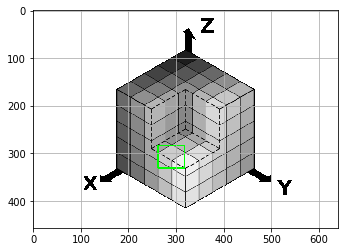

In [14]:
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

plt.grid()
plt.imshow(img2);

#### 7.b. Повернутый прямоугольник
Здесь ограничивающий прямоугольник рисуется с минимальной площадью, поэтому он учитывает и вращение. Используемая функция $-$ **cv2.minAreaRect()**. Он возвращает структуру **Box2D**, которая содержит следующие детали $-$ (центр $(x, y)$, (ширина, высота), угол поворота). Но чтобы нарисовать этот прямоугольник, нам нужно $4$ угла прямоугольника. Получается функцией **cv2.boxPoints()**.

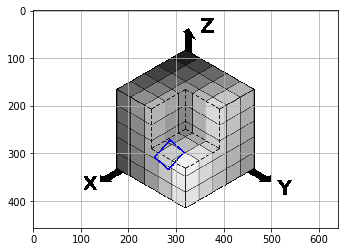

In [15]:
img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)


rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img2,[box],0,(0,0,255),2)

plt.grid()
plt.imshow(img2);

### 8. Подгонка линии
Точно так же мы можем подогнать линию к набору точек. Ниже изображение содержит набор белых точек. Мы можем приблизить к нему прямую линию.

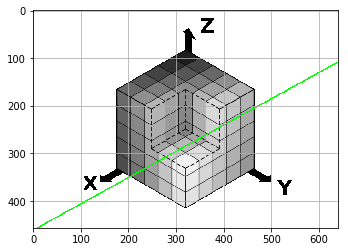

In [16]:
img2 = gray_img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img2,(cols-1,righty),(0,lefty),(0,255,0),2)

plt.grid()
plt.imshow(img2);

## Contour Properties

### 1. Соотношение сторон
Это отношение ширины к высоте ограничивающего прямоугольника объекта.

${AspectRatio = \frac{Width}{Height}}$

In [17]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

aspect_ratio

1.1458333333333333

### 2. Степень
Степень $-$ это отношение площади контура к площади ограничивающего прямоугольника.

${Extent=\frac{Object\ Area}{Bounding\ Rectangle\ Area}}$

In [18]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

extent

0.496780303030303

### 3. Solidity
Solidity $-$ это отношение площади контура к его площади выпуклой оболочки.

$Solidity = \frac{Contour \ Area}{Convex \ Hull \ Area}$


In [19]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

### 4. Эквивалентный диаметр
Эквивалентный диаметр $-$ это диаметр круга, площадь которого равна площади контура.

$Equivalent \ Diameter = \sqrt{\frac{4 \cdot \ Contour \ Area}{\pi}}$

In [20]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

### 5. Ориентация
Ориентация $-$ это угол, под которым направлен объект. Следующий метод также дает длины **Major Axis** и **Minor Axis**.


In [21]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

### 6. Маска и пиксельные точки
В некоторых случаях нам могут понадобиться все точки, которые составляют этот объект. Это можно сделать следующим образом:


In [22]:
mask = np.zeros(gray_img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

Здесь два метода, один из которых использует функции Numpy, а другой $-$ функцию OpenCV (последняя закомментированная строка), дают то же самое. Результаты тоже такие же, но с небольшой разницей. Numpy дает координаты в формате **(строка, столбец)**, а OpenCV - в формате **(x, y)**. Так что в основном ответы будут взаимозаменяемы. Обратите внимание, что row = x и column = y.

### 7. Максимальное значение, минимальное значение и их местоположение
Мы можем найти эти параметры, используя изображение маски.

In [23]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_img,mask = mask)

### 8. Средний цвет или средняя интенсивность
Здесь мы можем найти средний цвет объекта. Или это может быть средняя интенсивность объекта в режиме градаций серого. Мы снова используем ту же маску, чтобы сделать это.


In [24]:
mean_val = cv2.mean(img,mask = mask)

### 9. Экстремальные точки
Экстремальные точки означают самые верхние, самые нижние, самые правые и самые левые точки объекта.


In [25]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

(262, 314) (316, 298) 
 (289, 283) (288, 330)


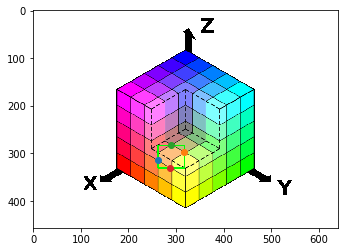

In [26]:
print(leftmost, rightmost,'\n', topmost, bottommost)

plt.imshow(img)
plt.scatter(leftmost[0], leftmost[1])
plt.scatter(rightmost[0], rightmost[1])
plt.scatter(topmost[0], topmost[1])
plt.scatter(bottommost[0], bottommost[1]);

## Домашняя работа №4

**Ложки сахар**

Ваша задача определить классы предметов на изображении. Известно, что класса всего 4: чайная ложка, монета, ручка, катушка ниток.

*Подумайте, какими геометрическими свойствами обладает каждый класс.*

Программа должна вывести исходное изображние, где каждый класс предмета помещен в цветную рамку. Каждый класс должен иметь свой цвет.

Примеры изображений:
<table><tr>
    <td> <img src="../src/spoons_coins/ex_1.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="../src/spoons_coins/ex_5.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>